$\newcommand{\norme}[1]{\left\Vert #1\right\Vert}$

Dans ce notebook, nous alons appliquer un filtre $A$ par convolution à une image $u_0$ et ensuite appliquer un bruit gaussien et obtenir l'image $v$: $v = A*u_0 + \varepsilon$.
Dans ce notebook A est une image en niveau de gris contenant le filtre, nous allons le completer pour qu'il soit de la même taille que $u_0$ et aussi le normer (la somme des tous ces éléments sera égale à 1).

Nous allons ensuite essayer de retrouver l'image original $u_0$ à partie de $v$ on utilise la formule:
$$ argmin_u {\norme{A*u - v}}_2^2 + \lambda\norme{\psi u}_2^2$$
Ou $v$ est l'image convolé, $u$ est l'image que l'on espère semblable à $u_0$ et $\psi$ est l'opérateur gradient.

On trouve après un calcul assez long une expression de u dans le domaine fréquentiel.
$$ \hat{u}(\zeta, \eta) = \displaystyle \frac{(\hat{A}^*.\hat{v})(\zeta, \eta)}{|\hat{A}|^2+\lambda \left ( \zeta^2 + \eta^2 \right )} $$

In [1]:
from libfonction import *

In [2]:
IMAGE = "lena"
img = Image.open(IMAGE+".png")

highest: 33614299.333333336


C:\Users\Jerem\Desktop\PROJET\JUPYTER\libfonction.py:79: ComplexWarning: Casting complex values to real discards the imaginary part
  img_grey = Image.fromarray(u.astype(np.uint8))


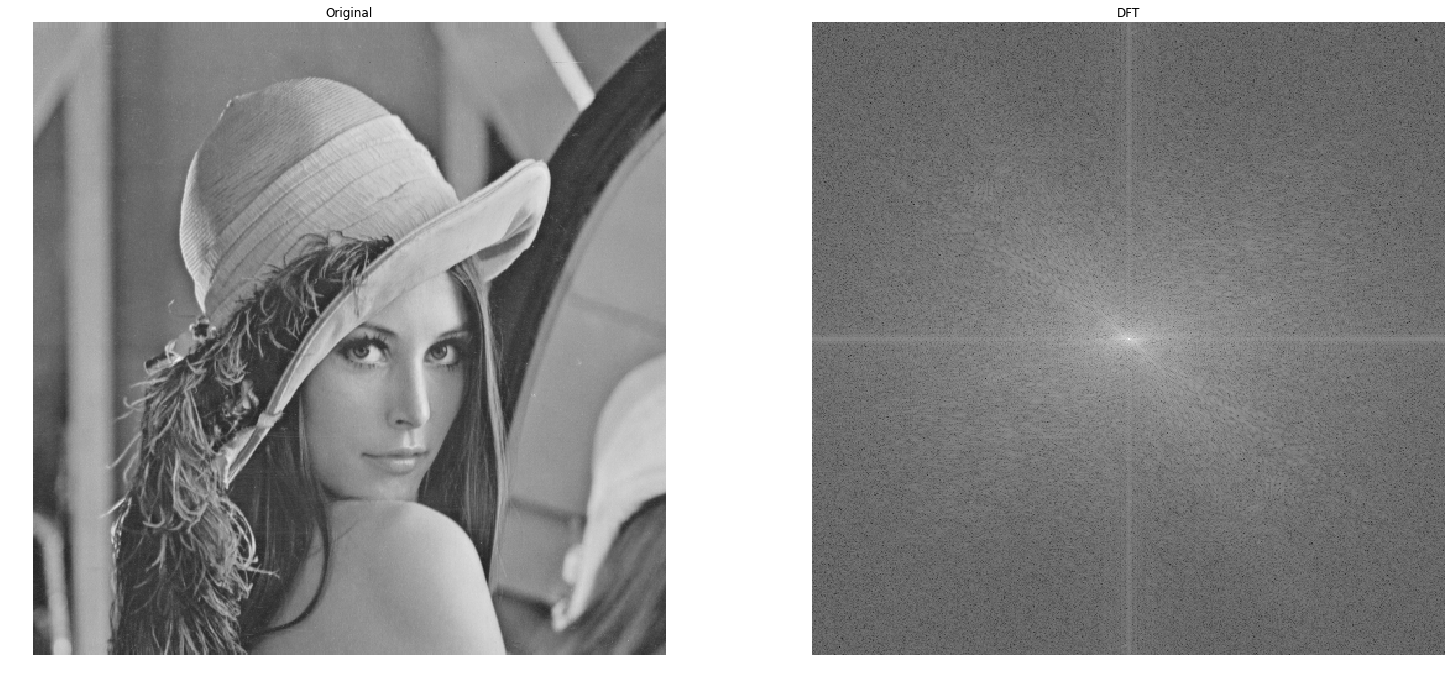

In [3]:
plot(img)

In [4]:
u_0 = np.asarray(img)
u_0 = grey(u_0)
X,Y = u_0.shape

In [63]:
FILTRE = "k7"
A_img = Image.open(FILTRE+".tif")
A = np.asarray(A_img)
A = grey(A)
A = linearNormalizationFilter(A)
print(A.sum())
A = addZeros(A, u_0.shape)

(1+0j)


In [64]:
v = abs(np.fft.ifft2(np.fft.fft2(u_0)*np.fft.fft2(A))) + 3*np.random.randn(X,Y)

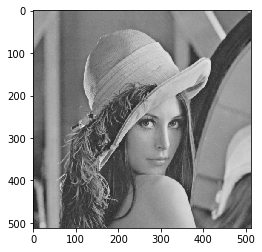

In [65]:
u_0_out = Image.fromarray(abs(u_0).astype(np.uint8))
u_0_out.save(IMAGE+"_grey.png")
plt.imshow(u_0_out)
plt.show()

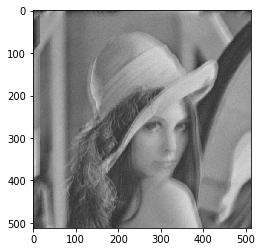

In [66]:
v_out = Image.fromarray(v.astype(np.uint8))
v_out.save(IMAGE+"_"+FILTRE+"_floubouge.png")
plt.imshow(v_out)
plt.show()

In [67]:
A_dft = np.fft.fft2(A)
v_dft = np.fft.fft2(v)
lambdaa = 0.000005

In [68]:
X,Y = u_0.shape
u_dft = np.zeros(u_0.shape, dtype=complex)
for x in range(-X//2, X//2):
    for y in range(-Y//2, Y//2):
        u_dft[x][y] = (v_dft[x][y]*A_dft[x][y].conjugate())  / ( abs(A_dft[x][y])**2 +  lambdaa*((x)**2 + (y)**2))

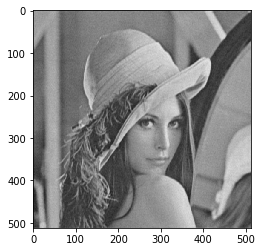

In [69]:
u = abs(np.fft.ifft2(u_dft))
u_out = Image.fromarray(u.astype(np.uint8))
u_out.save(IMAGE+"_"+FILTRE+"_floubouge_defloute.png")
plt.imshow(u_out)
plt.show()